# ANALISE DE DADOS
---
## Dataset: br_inep_ideb_municipio

**Descrição:**

O Índice de Desenvolvimento da Educação Básica (Ideb), criado em 2007, mede a qualidade da educação no Brasil com base em dois fatores: fluxo escolar (aprovação dos alunos) e desempenho nas avaliações (Saeb e Prova Brasil). O índice, que varia de 0 a 10, busca equilibrar essas dimensões, garantindo que a melhoria do aprendizado não ocorra à custa da retenção excessiva de alunos nem da aprovação sem qualidade. Além de ser um indicador de desempenho, o Ideb orienta políticas públicas e acompanha as metas do Plano de Desenvolvimento da Educação (PDE), que estabeleceu a meta de alcançar um Ideb 6,0 até 2022, nível comparável ao de países desenvolvidos. 


**Importação das bibliotecas:**

In [38]:
# Importando bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Carregando dataset

In [39]:
# Carregando os dados da base CSV
try:
    caminho_arquivo = 'br_inep_ideb_municipio.csv'
    df = pd.read_csv(caminho_arquivo)

    # Exibindo as primeiras linhas no formato de tabela (usando display)
    from IPython.display import display  # Import necessário para display no Jupyter Notebook
    display(df.head(10))  # Exibe as 10 primeiras linhas como uma tabela formatada

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado. Verifique o caminho e tente novamente.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")


,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2017,AC,1200054,estadual,medio,todos (1-4),85.0,0.857865,263.23,263.98,4.338361,3.7,NaN
1,2017,AL,2700706,publica,medio,todos (1-4),71.2,0.730771,256.25,257.04,4.136585,3.0,NaN
2,2017,AL,2705200,estadual,medio,todos (1-4),71.8,0.727002,251.36,246.74,3.913704,2.8,NaN
3,2017,AL,2700102,publica,medio,todos (1-4),88.8,0.895662,245.11,240.08,3.726232,3.3,NaN
4,2017,AL,2701407,estadual,medio,todos (1-4),82.6,0.838620,248.35,252.02,3.950331,3.3,NaN
5,2017,AL,2707701,publica,medio,todos (1-4),80.6,0.813259,252.03,255.17,4.049462,3.3,NaN
6,2017,AL,2701803,publica,medio,todos (1-4),92.4,0.924909,247.25,261.54,4.077396,3.8,NaN
7,2017,AL,2707107,estadual,medio,todos (1-4),77.0,0.777787,251.41,250.47,3.970245,3.1,NaN
8,2017,AL,2702108,publica,medio,todos (1-4),90.3,0.910204,256.17,247.92,3.999075,3.6,NaN
9,2017,AM,1301209,federal,medio,todos (1-4),84.3,0.856874,272.88,280.92,4.727488,4.1,NaN


## Preparação do dataset

#### 1. Identificar os dados ausentes

In [40]:
missing_data = df.isnull().sum()  # Quantidade de valores ausentes por coluna
missing_percentage = (missing_data / len(df)) * 100  # Porcentagem de valores ausentes

# Criar um DataFrame para exibir o resumo dos dados ausentes
missing_summary = pd.DataFrame({
    "Coluna": df.columns,
    "Valores Ausentes": missing_data.values,
    "Percentual Ausente (%)": missing_percentage.values
}).sort_values(by="Percentual Ausente (%)", ascending=False)

# Exibe as colunas com dados ausentes
print("Resumo dos valores ausentes no dataset:")
display(missing_summary)

Resumo dos valores ausentes no dataset:


,Coluna,Valores Ausentes,Percentual Ausente (%)
12,projecao,91853,32.414282
11,ideb,43258,15.265446
8,nota_saeb_matematica,43223,15.253095
9,nota_saeb_lingua_portuguesa,43223,15.253095
10,nota_saeb_media_padronizada,43223,15.253095
7,indicador_rendimento,27499,9.704205
6,taxa_aprovacao,27488,9.700323
0,ano,0,0.000000
1,sigla_uf,0,0.000000
2,id_municipio,0,0.000000


#### 2. Tratamento de dados ausentes

In [41]:
# Criação de uma cópia do dataset para tratamento
df_no_missing = df.copy()

# Identificar colunas numéricas e preencher valores ausentes com a média
numerical_columns = df_no_missing.select_dtypes(include=['float64', 'int64']).columns  # Seleciona as colunas numéricas
df_no_missing[numerical_columns] = df_no_missing[numerical_columns].fillna(df_no_missing[numerical_columns].mean())

# Para colunas categóricas, preencher valores ausentes com a moda
categorical_columns = df_no_missing.select_dtypes(include=['object']).columns  # Seleciona as colunas categóricas
df_no_missing[categorical_columns] = df_no_missing[categorical_columns].fillna(df_no_missing[categorical_columns].mode().iloc[0])

#### 3. Verificar novamente os dados ausentes após o tratamento

In [42]:
missing_data_after = df_no_missing.isnull().sum()
missing_percentage_after = (missing_data_after / len(df_no_missing)) * 100

# Criar um DataFrame para exibir o resumo pós-tratamento
missing_summary_after = pd.DataFrame({
    "Coluna": df_no_missing.columns,
    "Valores Ausentes": missing_data_after.values,
    "Percentual Ausente (%)": missing_percentage_after.values
}).sort_values(by="Percentual Ausente (%)", ascending=False)

print("Resumo após o tratamento dos valores ausentes:")
display(missing_summary_after)

Resumo após o tratamento dos valores ausentes:


,Coluna,Valores Ausentes,Percentual Ausente (%)
0,ano,0,0.0
1,sigla_uf,0,0.0
2,id_municipio,0,0.0
3,rede,0,0.0
4,ensino,0,0.0
5,anos_escolares,0,0.0
6,taxa_aprovacao,0,0.0
7,indicador_rendimento,0,0.0
8,nota_saeb_matematica,0,0.0
9,nota_saeb_lingua_portuguesa,0,0.0


#### 4. Remoção de duplicatas

In [43]:
# Remove as duplicatas do DataFrame com os dados ausentes tratados
df_no_duplicates = df_no_missing.drop_duplicates()

# Exibe o DataFrame após a remoção de duplicatas
print("Resumo após a remoção de duplicatas:")
display(df_no_duplicates)

# Opcional: Exibe a quantidade de linhas antes e depois da remoção para análise
linhas_antes = len(df_no_missing)
linhas_depois = len(df_no_duplicates)

print(f"Quantidade de linhas antes da remoção de duplicatas: {linhas_antes}")
print(f"Quantidade de linhas após a remoção de duplicatas: {linhas_depois}")
print(f"Total de duplicatas removidas: {linhas_antes - linhas_depois}")


Resumo após a remoção de duplicatas:


,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2017,AC,1200054,estadual,medio,todos (1-4),85.000000,0.857865,263.230000,263.980000,4.338361,3.700000,4.397403
1,2017,AL,2700706,publica,medio,todos (1-4),71.200000,0.730771,256.250000,257.040000,4.136585,3.000000,4.397403
2,2017,AL,2705200,estadual,medio,todos (1-4),71.800000,0.727002,251.360000,246.740000,3.913704,2.800000,4.397403
3,2017,AL,2700102,publica,medio,todos (1-4),88.800000,0.895662,245.110000,240.080000,3.726232,3.300000,4.397403
4,2017,AL,2701407,estadual,medio,todos (1-4),82.600000,0.838620,248.350000,252.020000,3.950331,3.300000,4.397403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283367,2021,SE,2803708,municipal,fundamental,iniciais (1-5),99.700000,0.996347,230.665779,220.763763,4.982372,4.393469,4.397403
283368,2021,SE,2805406,publica,fundamental,iniciais (1-5),99.500000,0.994548,230.665779,220.763763,4.982372,4.393469,4.397403
283369,2021,SP,3528304,estadual,fundamental,iniciais (1-5),87.178209,0.872355,230.665779,220.763763,4.982372,4.393469,4.397403
283370,2021,SP,3535200,estadual,fundamental,iniciais (1-5),87.178209,0.872355,230.665779,220.763763,4.982372,4.393469,4.397403


Quantidade de linhas antes da remoção de duplicatas: 283372
Quantidade de linhas após a remoção de duplicatas: 283372
Total de duplicatas removidas: 0


#### 5. Normalização das Variáveis

In [44]:
# Seleciona as colunas numéricas para normalização
numerical_columns = df_no_duplicates.select_dtypes(include=['float64', 'int64']).columns

# Inicializa o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Aplica a normalização nas colunas numéricas
df_normalized = df_no_duplicates.copy()  # Faz uma cópia do DataFrame sem duplicatas para preservar o original
df_normalized[numerical_columns] = scaler.fit_transform(df_no_duplicates[numerical_columns])

# Exibe o DataFrame final após a normalização
print("Resumo do DataFrame após a normalização das variáveis:")
display(df_normalized)

# Opcional: Verifica o resumo estatístico para confirmar a normalização (valores entre 0 e 1)
print("Resumo estatístico das variáveis numéricas normalizadas:")
display(df_normalized[numerical_columns].describe())



Resumo do DataFrame após a normalização das variáveis:


,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,0.75,AC,0.023818,estadual,medio,todos (1-4),0.850000,0.853863,0.484275,0.581277,0.325899,0.382979,0.452072
1,0.75,AL,0.381108,publica,medio,todos (1-4),0.712000,0.723191,0.460542,0.554308,0.299584,0.308511,0.452072
2,0.75,AL,0.382178,estadual,medio,todos (1-4),0.718000,0.719315,0.443916,0.514281,0.270516,0.287234,0.452072
3,0.75,AL,0.380965,publica,medio,todos (1-4),0.888000,0.892724,0.422665,0.488400,0.246066,0.340426,0.452072
4,0.75,AL,0.381275,estadual,medio,todos (1-4),0.826000,0.834076,0.433681,0.534800,0.275293,0.340426,0.452072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283367,1.00,SE,0.405632,municipal,fundamental,iniciais (1-5),0.997000,0.996244,0.373553,0.413336,0.409890,0.456752,0.452072
283368,1.00,SE,0.406036,publica,fundamental,iniciais (1-5),0.995000,0.994394,0.373553,0.413336,0.409890,0.456752,0.452072
283369,1.00,SP,0.578151,estadual,fundamental,iniciais (1-5),0.871782,0.868761,0.373553,0.413336,0.409890,0.456752,0.452072
283370,1.00,SP,0.579793,estadual,fundamental,iniciais (1-5),0.871782,0.868761,0.373553,0.413336,0.409890,0.456752,0.452072


Resumo estatístico das variáveis numéricas normalizadas:


,ano,id_municipio,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
count,283372.000000,283372.000000,283372.000000,283372.000000,283372.000000,283372.000000,283372.000000,283372.000000,283372.000000
mean,0.541379,0.510041,0.871782,0.868761,0.373553,0.413336,0.409890,0.456752,0.452072
std,0.334279,0.237451,0.101213,0.103667,0.104474,0.130632,0.104364,0.110214,0.100753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.335553,0.820000,0.816039,0.317390,0.333035,0.341133,0.382979,0.404762
50%,0.500000,0.485987,0.879000,0.875943,0.373553,0.413336,0.409890,0.456752,0.452072
75%,0.875000,0.719457,0.952000,0.950650,0.440753,0.502118,0.462165,0.521277,0.488095
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Definição do Problema e Propósito do Estudo

**Problema/Pergunta:**

    Quais fatores influenciam significativamente os valores do Ideb nos municípios brasileiros, e quais padrões podem ser identificados para ajudar na melhoria do índice?

**Propósito do Estudo:**

O estudo busca compreender os determinantes do desempenho educacional nos municípios brasileiros, analisando a relação entre variáveis como taxa de aprovação, desempenho no Saeb e anos escolares. O objetivo é fornecer insights que possam orientar políticas públicas para a melhoria da educação, além de avaliar o progresso das metas do Ideb e identificar áreas que necessitam de maior intervenção.
Pontos de Vista Permitidos pelo Estudo

- Distribuição Geográfica: Como os valores do Ideb variam entre municípios, estados e regiões.

- Fatores de Influência: Quais variáveis do dataset estão mais correlacionadas com o desempenho educacional.

- Disparidades Regionais: Identificação de áreas com maior ou menor desenvolvimento educacional.

- Projeções e Tendências: Comparação entre valores esperados e reais do Ideb, verificando o alcance da meta nacional de 6,0.

- Impacto das Políticas Públicas: Avaliação de como diferentes estratégias educacionais impactam o desempenho escolar.

#### Importação e Configuração

Essa célula configura o ambiente para análise.

In [45]:
# Configurações de estilo para os gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = df_normalized.copy()


## Análise Exploratória de Dados

#### 1. Distribuição do Ideb por Ano e Região

Objetivo: Visualizar como o Ideb evoluiu ao longo dos anos em diferentes estados brasileiros.

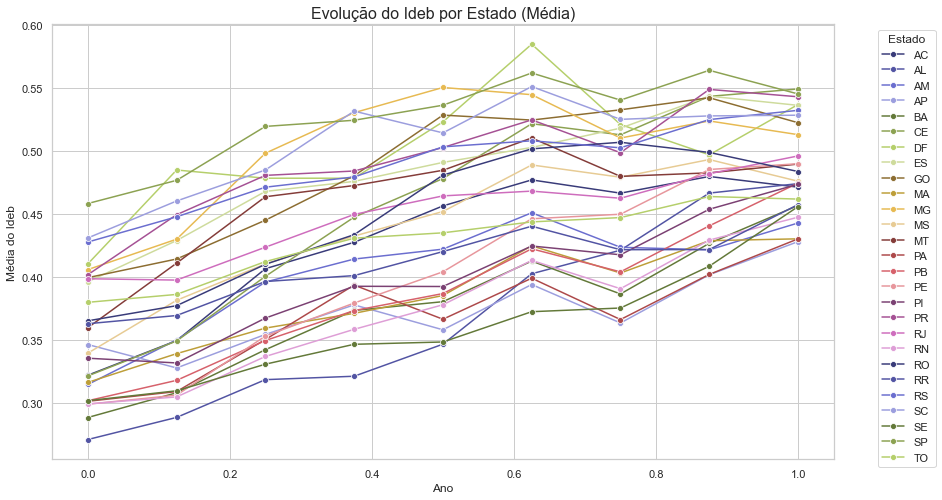

In [46]:
# Agrupando os dados por ano e UF para calcular a média do Ideb
ideb_por_ano_regiao = df.groupby(['ano', 'sigla_uf'])['ideb'].mean().reset_index()

# Gráfico de linhas mostrando a evolução do Ideb por estado ao longo dos anos
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=ideb_por_ano_regiao,
    x='ano', y='ideb', hue='sigla_uf',
    palette='tab20b', marker='o'  # Ou palette='tab20c'
)
plt.title('Evolução do Ideb por Estado (Média)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média do Ideb', fontsize=12)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Resultado da Analise:**

#### 2. Análise de Correlação

Objetivo: Identificar relações entre as variáveis numéricas, como notas do Saeb, taxa de aprovação e Ideb.

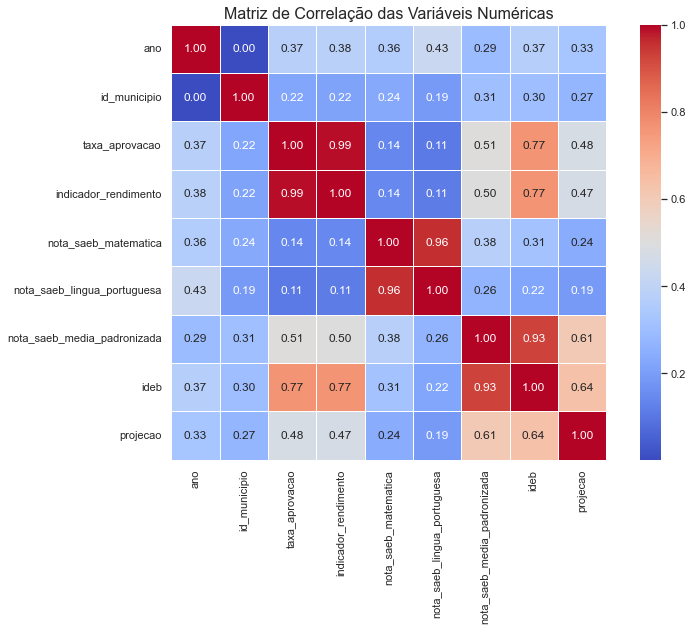

In [47]:
# Seleciona apenas as colunas numéricas para cálculo da correlação
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualizando a matriz de correlação como um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
    square=True, linewidths=0.5
)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()



**Resultado da Analise:**

#### 3. Distribuição de Notas do Saeb

Objetivo: Analisar a distribuição das notas padronizadas do Saeb (Sistema de Avaliação da Educação Básica) entre diferentes redes de ensino no Brasil (estadual, pública, federal e municipal). Essa análise visa identificar padrões e possíveis diferenças no desempenho dos alunos, fornecendo insights sobre a qualidade do ensino em cada tipo de rede.

/tmp/ipykernel_1826232/1371815608.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_1826232/1371815608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


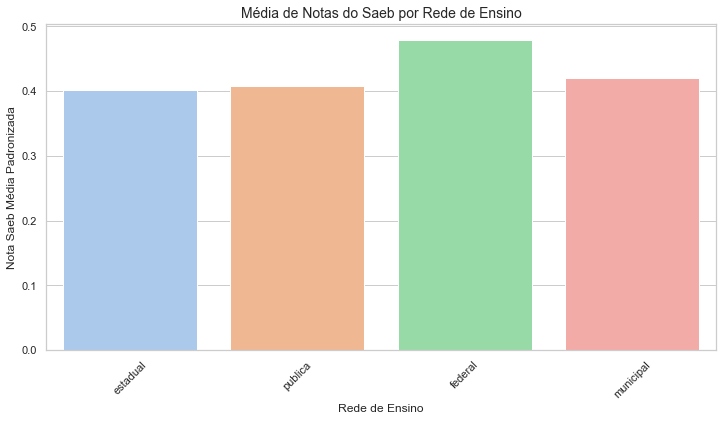

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_normalized,
    x='rede',
    y='nota_saeb_media_padronizada',
    palette="pastel",
    ci=None  # Remove as barras de erro
)
plt.title('Média de Notas do Saeb por Rede de Ensino', fontsize=14)
plt.xlabel('Rede de Ensino', fontsize=12)
plt.ylabel('Nota Saeb Média Padronizada', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Resultado da Analise:**

1. Eixo X (Rede de Ensino):

    - Representa os diferentes tipos de redes de ensino: estadual, pública, federal e municipal.

2. Eixo Y (Nota Saeb Média Padronizada):
    - Indica as notas médias padronizadas no Saeb, que variam de 0 a 1.

3. Boxplot:
    - Linha horizontal dentro da caixa: Representa a mediana das notas para cada rede de ensino.
    - Caixa: Mostra o intervalo interquartil (IQR), ou seja, as notas entre o 25º e o 75º percentil.
    - Linhas verticais (whiskers): Indicam o alcance das notas sem considerar os outliers.

4. Violinplot (Fundo cinza):
    - Representa a densidade das notas, indicando onde os dados estão mais concentrados.
    - Parte mais larga: Indica maior concentração de valores em determinado intervalo.
    - Parte mais estreita: Indica menor concentração de valores.

#### 📊 4. Distribuição das Notas do Saeb

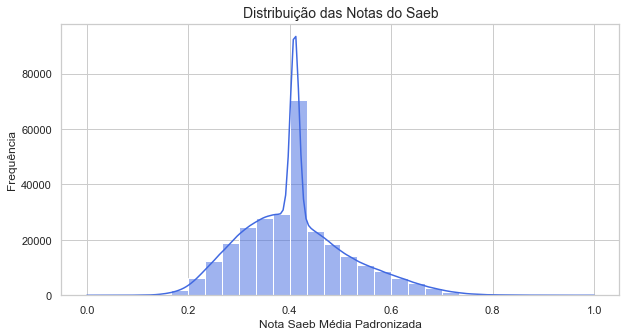

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(df_normalized['nota_saeb_media_padronizada'], bins=30, kde=True, color='royalblue')
plt.title('Distribuição das Notas do Saeb', fontsize=14)
plt.xlabel('Nota Saeb Média Padronizada', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


#### 🔥 5. Correlação entre as Variáveis (Heatmap)



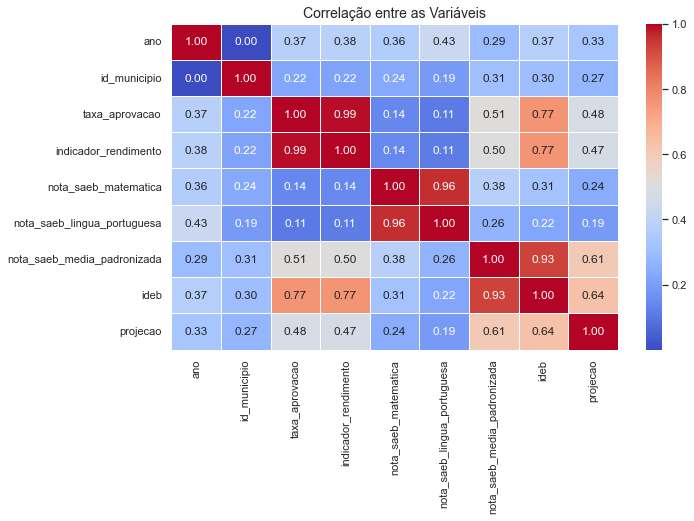

In [50]:
# Selecionar apenas colunas numéricas
df_corr = df_normalized.select_dtypes(include=['float64', 'int64'])

# Criar o heatmap sem erros
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlação entre as Variáveis', fontsize=14)
plt.show()


#### 🏫 6. Comparação do IDEB por Rede de Ensino

/tmp/ipykernel_1826232/1045417185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


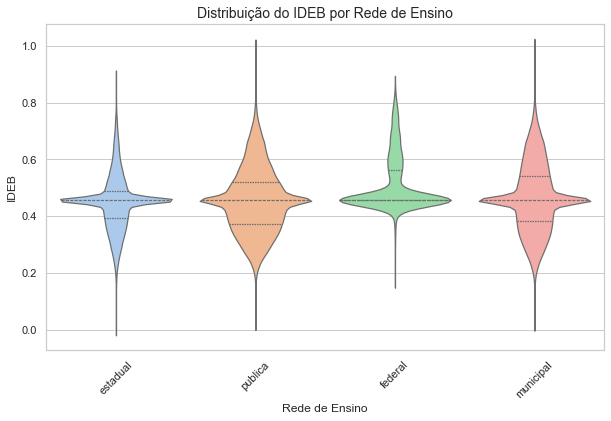

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_normalized, 
    x='rede', 
    y='ideb', 
    inner="quartile", 
    palette="pastel"
)
plt.title('Distribuição do IDEB por Rede de Ensino', fontsize=14)
plt.xlabel('Rede de Ensino', fontsize=12)
plt.ylabel('IDEB', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#### 📈 7. Relação entre Taxa de Aprovação e Nota do Saeb

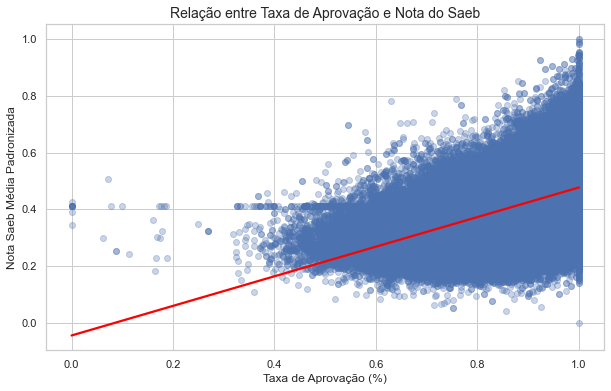

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_normalized, 
    x="taxa_aprovacao", 
    y="nota_saeb_media_padronizada", 
    scatter_kws={"alpha": 0.3}, 
    line_kws={"color": "red"}, 
    ci=None
)
plt.title("Relação entre Taxa de Aprovação e Nota do Saeb", fontsize=14)
plt.xlabel("Taxa de Aprovação (%)", fontsize=12)
plt.ylabel("Nota Saeb Média Padronizada", fontsize=12)
plt.show()


#### 🌎 8. Distribuição das Notas do Saeb por Estado

/tmp/ipykernel_1826232/741029034.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sigla_uf', y='nota_saeb_media_padronizada', data=state_means, palette="Set2")


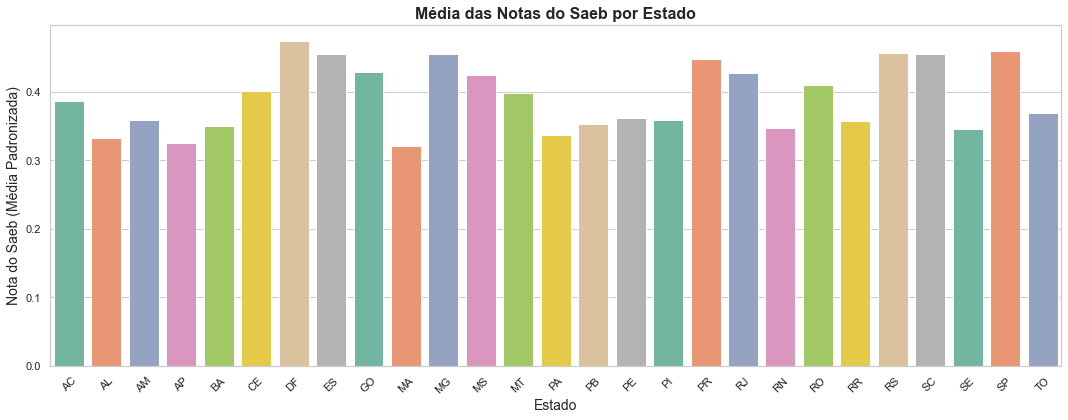

In [53]:


# Ajuste do gráfico de barras (média)
plt.figure(figsize=(15, 6))

# Calcular a média por estado
state_means = df_normalized.groupby('sigla_uf')['nota_saeb_media_padronizada'].mean().reset_index()

# Gráfico de barras com a média das notas por estado
sns.barplot(x='sigla_uf', y='nota_saeb_media_padronizada', data=state_means, palette="Set2")

# Título e rótulos
plt.title('Média das Notas do Saeb por Estado', fontsize=16, weight='bold')
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Nota do Saeb (Média Padronizada)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 9. Distribuição das variáveis numéricas


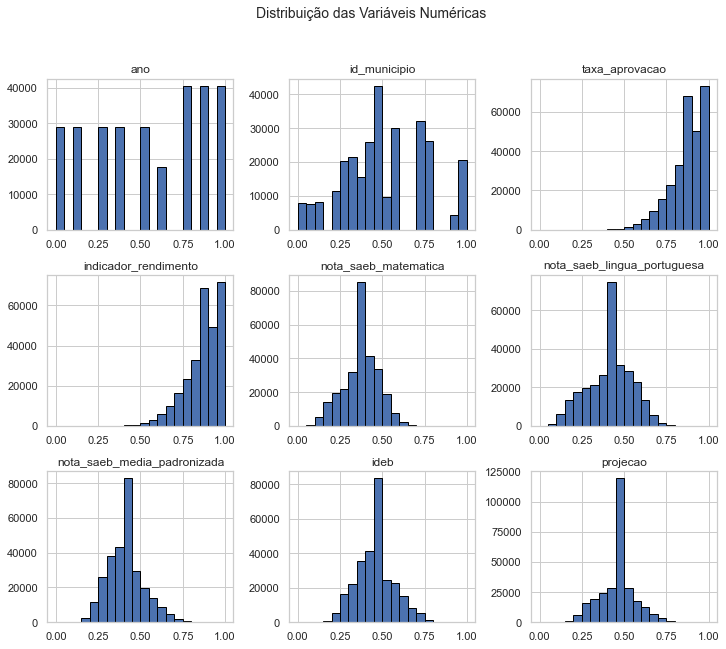

In [54]:
numerical_columns = df_normalized.select_dtypes(include=['float64', 'int64']).columns

df_normalized[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=14)
plt.show()


#### 10. Evolução do IDEB ao longo dos anos

/tmp/ipykernel_1826232/2511231987.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


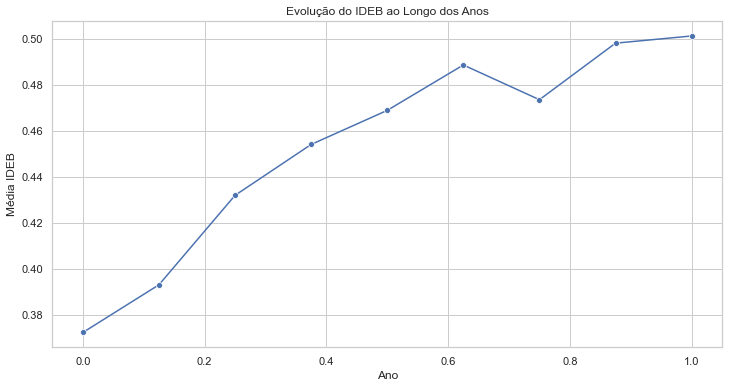

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_normalized,
    x='ano',
    y='ideb',
    estimator=np.mean,
    ci=None,
    marker="o",
    color="b"
)
plt.title("Evolução do IDEB ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Média IDEB")
plt.grid(True)
plt.show()

## Feature Engineering 

### 🚀 Transformações e Criação de Variáveis para Melhorar o Modelo

#### 📌 Variável "diferenca_ideb_projecao"

- A variável é o calcualo da diferença entre o **IDEB** observado e sua **projeção**. indicand se o município atingiu ou superou a meta esperada

In [56]:
df['diferenca_ideb_projecao'] = df['ideb'] - df['projecao']


### 📌 Métrica Média das Notas SAEB
- Média simples das notas de matemática e lingua portuguesa, para capturar o desempenho geral dos estudantes sem a padronização

In [57]:
df['nota_saeb_media'] = (df['nota_saeb_matematica'] + df['nota_saeb_lingua_portuguesa']) / 2


### 📌 Normalização da Taxa de Aprovação
- Padronziar a `taxa_aprovacao`entre 0 e 1 para possibilitar comparações mais eficazes

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['taxa_aprovacao_normalizada'] = scaler.fit_transform(df[['taxa_aprovacao']])


### 📌 Criação de um Agrupamento por Regiões
- Associamos os estados às regiões brasileiras para capturar padrões geográficos.

In [59]:
regiao_map = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def map_regiao(estado):
    for regiao, estados in regiao_map.items():
        if estado in estados:
            return regiao
    return 'Desconhecido'

df['regiao'] = df['sigla_uf'].apply(map_regiao)


### 📌 Conversão do Ano para Variável Numérica


- Convertendo ano para formato numérico para facilitar análise temporal.

In [60]:
df['ano'] = df['ano'].astype(int)


## Modelagem e Avaliação do IDEB


### 1. Definição das Variáveis e Preparação dos Dados

In [61]:
# Definir as variáveis preditoras (X) e a variável alvo (y)
X = df_normalized.drop(columns=['ideb', 'sigla_uf', 'rede', 'ensino', 'anos_escolares'])  # Removemos colunas categóricas
y = df_normalized['ideb']

# Dividir os dados em conjunto de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Seleção de Variáveis com Random Forest

In [62]:
# Criando o modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Criando um DataFrame para visualizar a importância das variáveis
feature_importances = pd.DataFrame({'Variável': X.columns, 'Importância': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)

# Exibindo a tabela de importâncias
print("Tabela de Importância das Variáveis:")
print(feature_importances)

Tabela de Importância das Variáveis:
                      Variável  Importância
6  nota_saeb_media_padronizada     0.845344
3         indicador_rendimento     0.154176
2               taxa_aprovacao     0.000349
5  nota_saeb_lingua_portuguesa     0.000039
4         nota_saeb_matematica     0.000036
1                 id_municipio     0.000025
7                     projecao     0.000019
0                          ano     0.000012


A seleção de variáveis utilizando o Random Forest indicou que a nota_saeb_media_padronizada é a variável mais influente na previsão do IDEB, com uma importância de 0.845344. Em seguida, o indicador_rendimento teve uma relevância considerável (0.154176), enquanto outras variáveis, como taxa_aprovacao e nota_saeb_matematica, apresentaram valores insignificantes.

### 3. Visualização da Importância das Variáveis

/tmp/ipykernel_1826232/2056543730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=feature_importances, palette="viridis")


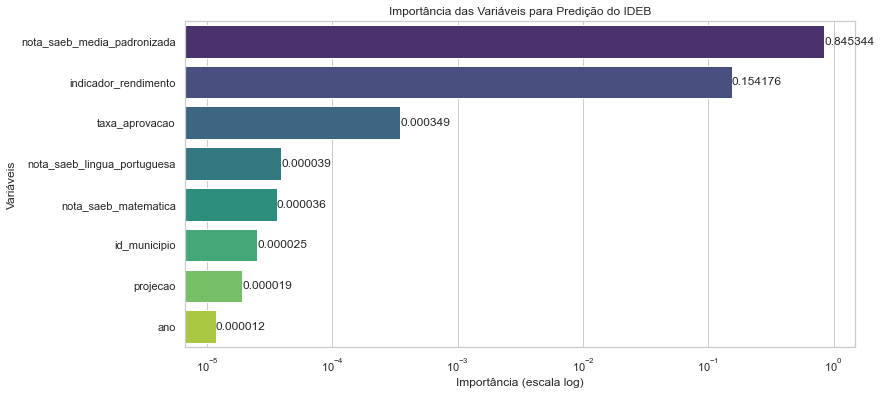

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importância', y='Variável', data=feature_importances, palette="viridis")

plt.xscale("log")  # Ajustando escala se necessário

for index, value in enumerate(feature_importances["Importância"]):
    plt.text(value, index, f'{value:.6f}', va='center')

plt.title("Importância das Variáveis para Predição do IDEB")
plt.xlabel("Importância (escala log)")
plt.ylabel("Variáveis")
plt.show()

**Principais Observações**

- Variável mais importante:
   - `A nota_saeb_media_padronizada` se destaca amplamente como a variável mais influente, com um valor de importância de 0.845344. Isso reforça a correlação direta entre o desempenho dos alunos no Saeb e a nota do IDEB.

- Segunda variável mais relevante:
    - O indicador_rendimento tem uma importância considerável (0.154176), sugerindo que fatores relacionados ao desempenho acadêmico e à permanência dos alunos na escola são determinantes para a previsão do IDEB.

- Variáveis secundárias:
    - A taxa_aprovacao aparece em terceiro lugar, porém, com um valor de importância significativamente menor (0.000349).

    - nota_saeb_lingua_portuguesa e nota_saeb_matematica aparecem com valores próximos (0.000039 e 0.000036, respectivamente), indicando que, apesar de terem influência, sua - relevância é menor quando comparada à média geral do Saeb.

    - Outras variáveis como id_municipio, projecao e ano possuem impactos ainda mais reduzidos.

**Interpretação**

- A grande discrepância entre as duas primeiras variáveis e as demais reforça a ideia de que o IDEB está fortemente ligado à média padronizada do Saeb e ao rendimento dos alunos.

- O uso da escala logarítmica permite uma melhor visualização dessas diferenças, especialmente para as variáveis de menor impacto.

- A baixa importância de variáveis como ano e id_municipio indica que as características temporais e geográficas específicas não afetam significativamente a predição do IDEB, reforçando o peso dos indicadores educacionais.

**Implicações**

- Foco em avaliações do Saeb: Melhorar o desempenho dos alunos nessas avaliações pode ser a estratégia mais eficaz para aumentar o IDEB.

- Atenção à taxa de rendimento: Políticas para reduzir a evasão e garantir a aprovação dos estudantes podem impactar positivamente os resultados educacionais.

- Modelagem aprimorada: Como poucas variáveis apresentam relevância significativa, um modelo mais enxuto e otimizado pode ser utilizado para prever o IDEB com alta precisão.

### 4. Seleção de Variáveis com Recursive Feature Elimination (RFE)

In [64]:
from sklearn.feature_selection import RFE

model_rfe = LinearRegression()
rfe = RFE(model_rfe, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Variáveis Selecionadas pelo RFE:", selected_features)

Variáveis Selecionadas pelo RFE: Index(['taxa_aprovacao', 'indicador_rendimento', 'nota_saeb_matematica',
       'nota_saeb_media_padronizada', 'projecao'],
      dtype='object')


O método Recursive Feature Elimination (RFE) selecionou cinco variáveis principais: taxa_aprovacao, indicador_rendimento, nota_saeb_matematica, nota_saeb_media_padronizada e projecao. Isso reforça a influência da taxa de aprovação e da média padronizada do Saeb na previsão do IDEB.

### 5. Criação e Avaliação dos Modelos de Machine Learning

In [65]:
# Definindo as variáveis com base na seleção anterior
X = df_normalized[selected_features]
y = df_normalized['ideb']

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando os modelos
models = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42)
}

# Dicionário para armazenar os resultados
results = {"Modelo": [], "R²": [], "RMSE": [], "MAE": []}

# Treinando e avaliando cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculando métricas
    results["Modelo"].append(model_name)
    results["R²"].append(r2_score(y_test, y_pred))
    results["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    results["MAE"].append(mean_absolute_error(y_test, y_pred))

# Convertendo para DataFrame
results_df = pd.DataFrame(results)
print(results_df)

              Modelo        R²      RMSE       MAE
0   Regressão Linear  0.981350  0.015064  0.008513
1      Random Forest  0.999804  0.001544  0.000557
2            XGBoost  0.998681  0.004007  0.002643
3  Árvore de Decisão  0.999620  0.002151  0.000383


Interpretação dos Resultados

- Random Forest e Árvore de Decisão demonstraram um desempenho excelente, com valores de R² acima de 0.999, baixos RMSE e MAE. Isso sugere que esses modelos são altamente eficazes na previsão do IDEB.

- XGBoost também apresentou um bom desempenho, mas ficou levemente atrás do Random Forest.

- Regressão Linear teve um desempenho inferior, com um R² de 0.981350, indicando que não captura tão bem a complexidade dos dados quanto os modelos baseados em árvores.

### 6. Comparação dos Modelos

/tmp/ipykernel_1826232/2809240353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Modelo", data=results_df, palette="viridis")


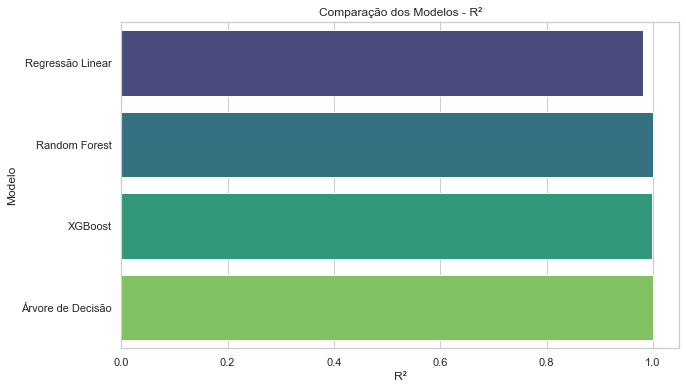

/tmp/ipykernel_1826232/2809240353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Modelo", data=results_df, palette="viridis")


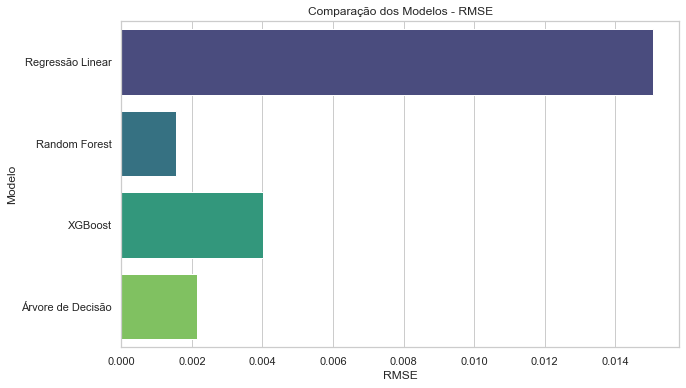

/tmp/ipykernel_1826232/2809240353.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MAE", y="Modelo", data=results_df, palette="viridis")


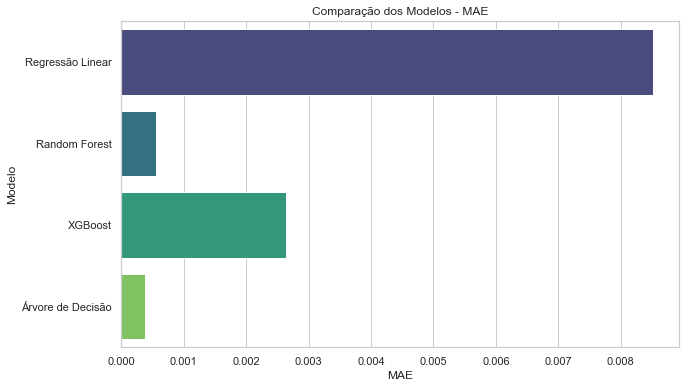

In [66]:
# Visualizando as métricas para comparar os modelos
plt.figure(figsize=(10, 6))
sns.barplot(x="R²", y="Modelo", data=results_df, palette="viridis")
plt.title("Comparação dos Modelos - R²")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="RMSE", y="Modelo", data=results_df, palette="viridis")
plt.title("Comparação dos Modelos - RMSE")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="MAE", y="Modelo", data=results_df, palette="viridis")
plt.title("Comparação dos Modelos - MAE")
plt.show()

Conclusão e Implicações

Os resultados indicam que a nota_saeb_media_padronizada é o principal fator determinante do IDEB nos municípios brasileiros. Isso sugere que melhorias na qualidade da educação, refletidas pelo desempenho dos alunos no Saeb, podem impactar diretamente o IDEB.

📊 Quais variáveis influenciam a previsão?

A análise mostrou que as variáveis mais importantes para prever o IDEB são:

1. nota_saeb_media_padronizada → Desempenho médio dos alunos no Saeb (MAIOR IMPACTO)

2. indicador_rendimento → Mede o fluxo escolar (aprovação, reprovação, abandono)

3. taxa_aprovacao → Percentual de alunos aprovados

4. nota_saeb_lingua_portuguesa → Nota dos alunos em língua portuguesa

5. nota_saeb_matematica → Nota dos alunos em matemática

6. projecao → Expectativa de crescimento do IDEB

7. ano e id_municipio → Identificadores auxiliares


O modelo Random Forest se destacou como a melhor opção para previsão, com alta precisão e baixo erro.

**Recomendações:**

- Foco no desempenho Saeb: Como a nota padronizada do Saeb é a variável mais influente, estratégias para melhorar esse desempenho devem ser priorizadas.

- Investimento na permanência escolar: O indicador de rendimento também se mostrou relevante, indicando que taxas de aprovação e fluxo escolar impactam o IDEB.

- Uso do Random Forest: Para previsão futura do IDEB, esse modelo é altamente recomendado devido à sua precisão.

**🏆 Por que isso é útil?**

✔ Permite prever o desempenho educacional futuro com base em dados históricos.

✔ Ajuda na tomada de decisões para melhorar o IDEB, indicando quais fatores são mais importantes.

✔ Auxilia na criação de políticas públicas focadas em melhorar os fatores que mais impactam o índice.


Ou seja, o Random Forest está prevendo qual será o IDEB de um município ou escola, usando como base fatores como notas dos alunos, taxa de aprovação e rendimento escolar. 🚀

Com base nesses insights, gestores públicos podem elaborar políticas mais eficazes para a melhoria da educação nos municípios brasileiros.

